In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [118]:
import sklearn
sklearn.__version__

'1.1.1'

In [119]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='07i9VLG7zlDnzqqpHMSx9q5ZHVYOgtoAD3-KfVHq4v_P',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'liverpatient-donotdelete-pr-naz1dbm06zqpbv'
object_key = 'indian_liver_patient.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [120]:
# showing the data from top 5
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [121]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [122]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [124]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [125]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [126]:
data[data['Dataset']==1]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
576,32,Male,15.0,8.2,289,58,80,5.3,2.2,0.70,1
577,32,Male,12.7,8.4,190,28,47,5.4,2.6,0.90,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1


In [127]:
data['Dataset'].unique()

array([1, 2])

In [128]:
#checking for missing data
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [129]:
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mode()[0], inplace=True)


In [130]:
#checking for the missing data after cleaning data
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mode()[0], inplace=True)
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

NameError: name 'ylabel' is not defined

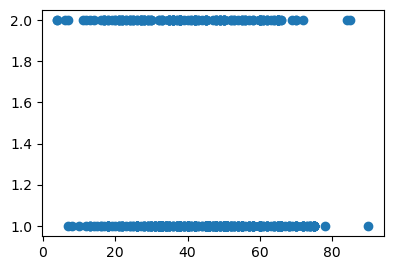

In [131]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
plt.scatter(data['Age'], data['Dataset'])
ylabel('Dataset')
xlabel('Age')


plt.subplot(3,3,2)
plt.scatter(data['Gender'], data['Dataset'],)
ylabel('Dataset')
xlabel('Gender')

plt.subplot(3,3,3)
plt.scatter(data['Total_Bilirubin'], data['Dataset'],)
ylabel('Dataset')
xlabel('Total_Bilirubin')


plt.subplot(3,3,4)
plt.scatter(data['Direct_Bilirubin'], data['Dataset'],)
ylabel('Dataset')
xlabel('Direct_Bilirubin')

plt.subplot(3,3,5)
plt.scatter(data['Alkaline_Phosphotase'], data['Dataset'],)
ylabel('Dataset')
xlabel('Alkaline_Phosphotase')

plt.subplot(3,3,6)
plt.scatter(data['Alamine_Aminotransferase'], data['Dataset'],)
ylabel('Dataset')
xlabel('Alamine_Aminotransferase')


plt.subplot(3,3,7)
plt.scatter(data['Aspartate_Aminotransferase'], data['Dataset'],)
ylabel('Dataset')
xlabel('Aspartate_Aminotransferase')

plt.subplot(3,3,8)
plt.scatter(data['Total_Protiens'], data['Dataset'],)
ylabel('Dataset')
xlabel('Total_Protiens')

plt.subplot(3,3,9)
plt.scatter(data['Albumin_and_Globulin_Ratio'], data['Dataset'])
ylabel('Dataset')
xlabel('Albumin_and_Globulin_Ratio')

liver disease patinets: 416
Non-liver disease patinets: 167


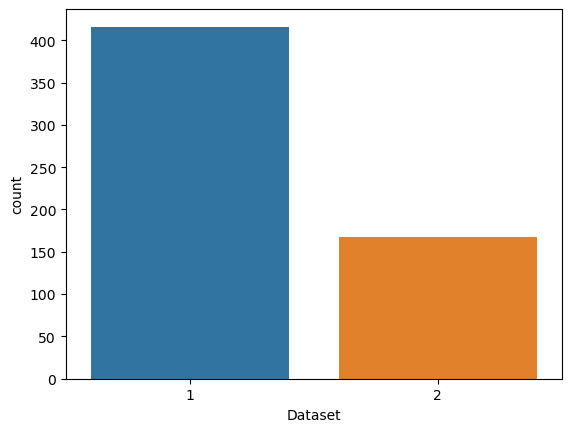

In [132]:
# Counting patients who are diagnosed and not diagnoised with liver disease
sns.countplot(data=data, x = 'Dataset')
LD,NLD=data['Dataset'].value_counts()
print("liver disease patinets:",LD)
print("Non-liver disease patinets:",NLD)

No of Males: 441
No of Females: 142


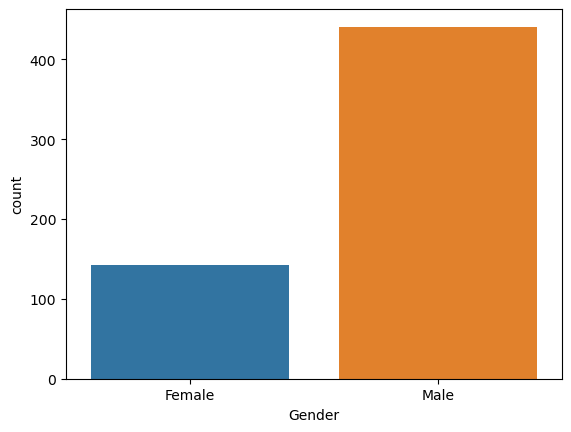

In [133]:
# Counting patients who are Male and who are Female
sns.countplot(data=data, x = 'Gender', label='Count')
m,f=data['Gender'].value_counts()
print("No of Males:",m)
print("No of Females:",f)

In [134]:
# Importing the LabelEncoder libraray from scikit-learn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Converting Textual data into numeric data
data['Gender'] = le.fit_transform(data['Gender'])
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [135]:
#Converting Textual data into numeric data
data['Gender'] = le.fit_transform(data['Gender'])

In [136]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [137]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [138]:
# dividing the data into input and output
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [139]:
# importing the train_test_split from scikit-learn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [140]:
# Returns size of xtrain 
xtrain.shape

(466, 10)

In [141]:
# Returns size of xtest
xtest.shape

(117, 10)

In [142]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [143]:
# Importing the machine learning model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [144]:
# Initializing the machine learning models
svm=SVC()
RFmodel=RandomForestClassifier()
KNNmodel=KNeighborsClassifier()

In [145]:
#Support Vector Machine Model
from sklearn.svm import SVC
svm=SVC()

In [146]:
# train the data with SVM model
svm.fit(xtrain, ytrain)

SVC()

In [147]:
SVMpred=svm.predict(xtest)

In [148]:
# Checking for accuracy score from actual data and predicted data
SVMaccuracy=accuracy_score(SVMpred, ytest)
SVMaccuracy

0.7948717948717948

In [149]:
# showing the confusion matrix
SVMcm=confusion_matrix(SVMpred, ytest)
SVMcm

array([[93, 24],
       [ 0,  0]])

In [150]:
#Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
RFmodel=RandomForestClassifier()

In [151]:
# train the data with Random Forest model
RFmodel.fit(xtrain, ytrain)

RandomForestClassifier()

In [152]:
RFpred=RFmodel.predict(xtest)

In [153]:
# Checking for accuracy score from actual data and predicted data
RFaccuracy=accuracy_score(RFpred, ytest)
RFaccuracy

0.7863247863247863

In [154]:
# showing the confusion matrix
RFcm=confusion_matrix(RFpred, ytest)
RFcm

array([[79, 11],
       [14, 13]])

In [155]:
# K-Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [156]:
# train the data with K-Nearest Neighbors Model
KNN.fit(xtrain, ytrain)

KNeighborsClassifier()

In [157]:
KNNpred=KNN.predict(xtest)

In [158]:
# Checking for accuracy score from actual data and predicted data
KNNaccuracy=accuracy_score(KNNpred, ytest)
KNNaccuracy

0.6837606837606838

In [159]:
# showing the confusion matrix
KNNcm=confusion_matrix(KNNpred, ytest)
KNNcm

array([[70, 14],
       [23, 10]])

In [160]:
print("Support Vector Machine Algorithm accuracy score : {value:.2f} %".format(value=SVMaccuracy*100))
print("Random Forest Algorithm accuracy score : {value:.2f} %".format(value=RFaccuracy*100))
print("K-Nearest Neighbors Algorithm accuracy score : {value:.2f} %".format(value=KNNaccuracy*100))

Support Vector Machine Algorithm accuracy score : 79.49 %
Random Forest Algorithm accuracy score : 78.63 %
K-Nearest Neighbors Algorithm accuracy score : 68.38 %


In [161]:
# saving the model
import pickle
pickle.dump(svm, open('liver_analysis.pkl','wb'))

In [162]:
!pip install watson-machine-learning-client --upgrade

In [163]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "ZYyMBCr--qRgBufFspYuJYaGP2H4faSaLmsStPaqMWS2"
}
client = APIClient(wml_credentials)

In [164]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [165]:
space_uid = guid_from_space_name(client, space_name='newdeployement')
print("Space UID = " + space_uid)

Space UID = a921b79d-8ffd-4b94-bc7d-899b90c14173


In [166]:
client.set.default_space(space_uid)

'SUCCESS'

In [167]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [168]:
software_spec_uid= client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [172]:
model_details = client.repository.store_model(model=RFmodel,
                                              meta_props={client.repository.ModelMetaNames.NAME:"churnmodeling",
                                                          client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
                                                          client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
                                                         },
                                              training_data=xtrain,
                                              training_target=ytrain)

In [173]:
model_id = client.repository.get_model_id(model_details)
model_id

'1ed74bca-2da2-400f-b322-e4f47f9dcc8e'

In [174]:
deployment = client.deployments.create(
    artifact_uid=model_id, 
    meta_props={client.deployments.ConfigurationMetaNames.NAME:"churnmodeling", 
    client.deployments.ConfigurationMetaNames.ONLINE: {}
})



#######################################################################################

Synchronous deployment creation for uid: '1ed74bca-2da2-400f-b322-e4f47f9dcc8e' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='c914044d-67b1-426b-a5a8-10fa663762b4'
------------------------------------------------------------------------------------------------




In [176]:
xtrain

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
364,21,1,0.8,0.2,183,33,57,6.8,3.5,1.00
198,41,1,0.9,0.2,169,22,18,6.1,3.0,0.90
280,58,1,0.8,0.2,123,56,48,6.0,3.0,1.00
422,41,1,1.2,0.5,246,34,42,6.9,3.4,0.97
272,21,1,18.5,9.5,380,390,500,8.2,4.1,1.00
...,...,...,...,...,...,...,...,...,...,...
344,37,1,0.8,0.2,195,60,40,8.2,5.0,1.50
505,32,1,32.6,14.1,219,95,235,5.8,3.1,1.10
17,33,1,1.6,0.5,165,15,23,7.3,3.5,0.92
417,11,1,0.7,0.1,592,26,29,7.1,4.2,1.40
